# Exploration of NBA Salaries
## Exploratory Data Analysis
### Data 601: Fall 2021
#### Team 10 - Big Data: Dennis Felson, Eric Lauper and Mark Ly


In [10]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## Introduction

The focus of our exploratory data analysis (EDA) will be on the salaries of athletes in the National Basketball Association (NBA).
In exploring this data, we hope to examine how total salaries are divided amongst the teams and the allocation amongst
players within certain teams. The earnings of top athletes are frequently addressed in the media and our team would like
to explore the magnitude of the pay gap between top-performing teams and the best individual athletes relative to others.


The salaries of athletes draw attention due to the announcement of large contracts for star players. Our team will provide an illustration of how these salaries have changed over the past 20 years. We will also visually explore how salaries paid may be linked to the overall success of a team to determine whether higher pay truly drives better performance. We will also visually compare and contrast the salaries of players in different positions to better understand team composition and considerations for future team formation.

## Guiding Questions

**1. How are the salaries of NBA players divided amongst the teams in the league and amongst the players within these teams?**

In exploring this question, we would like to look at the allocation of the salaries in the league overall and examine some constituent teams, some containing star power and others which do not. In doing so, we would like to identify how the allocations differ when there are star players on a team.


**2. Is there a significant correlation between the salaries paid and the success of a team?**

This question would assist in determining whether higher pay leads to better performance and if the ability for a team to succeed is dependent on the salaries paid. In exploring this relationship, it may be possible to better understand if pay is a critical driver for performance and whether the ability to pay higher salaries contributes to higher rates of success.


**3. How are player salaries related to the position played? How have these changed over time?**

Exploring these questions will identify if certain positions are more highly valued and provide insight into how team compositions may change over time. Understanding which roles are paid the most provides insight into the evolution of how the game of basketball is played and which positions require the most attention.

## Dataset

ESPN publishes NBA player salaries from 1990 to 2021. This page is organized in a structured table with headings for
Rank, Name, Position, Team and Salary (USD). We will build and use a web scraper to pull this data into the same columns
and export it into a comma separated file (CSV). To use this data, we will consent to the terms of use outline by The
Walt Disney Company outlined here https://disneytermsofuse.com/english/#Usage-Rules

For the NBA team salaries, we will get the data from the website HoopsHype which is a website from USA Today Sports.
HoopsHype has team salary data 1990 to 2021 which is organized and displayed in a structured html table with columns:
Rank, Team, Salary (USD), and Salary adjusted for inflation (USD) using the U.S. Department of Labor Bureau of Labor Statistic.
Again, we will be scraping by building a web scraper and export each year into CSV files. We will be stitching the
multiple CSV files into a single one and wrangle the data usable for data analysis. To use this data, we will consent to the terms of
use outline by USA Today found here https://cm.usatoday.com/terms

For any additional player and game information we will be using the website basketball-reference.com. The information
provided on this website is organized into structured tables which can be scraped if needed. Player data is separated
into Regular season and a Playoff table with 30 columns that include different counting stats during a basketball game.
These tables are available to download in a CSV format. Specifically, we will be using the team rating table, and the win and lose columns
in order to answer our second guiding question.
Basketball-reference is owned and operated by Sports Reference LLC. To use this data, we will consent to the terms of use
outlined by Sports Reference LLC which is found here https://www.sports-reference.com/termsofuse.html


### Packages
The following packages were used for this project.
Pandas, NumPy, requests, lxml, seaborn, glob, plotly, plotly.express

In [2]:
import requests
#import lxml.html as lh
import glob
import pandas as pd
import seaborn as sns
import plotly as plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px

# Data Wrangling
## Webscraping function

This webscraping function was used to grab team salary data from 1990 - 2021 from Hoopshype.com.

The data presented on this website was from the HoopsHype's salary database and the adjusted for inflation data points
were provided by Current US Dollars adjusted for inflation from data provided by the U.S.
Department of Labor Bureau of Labor Statistic

The function is based of the code from Syed Sadat Nazrul written for a tutorial on Web Scraping with python
written on Jul 25, 2018 https://towardsdatascience.com/web-scraping-html-tables-with-python-c9baba21059
We grabbed each of the pages individually and then stored the exported csv file locally. We will later merge all these
files into a single csv file in our data wrangling section.

In [3]:
def salary(url,year):
    url=url
    #Create a handle, page, to handle the contents of the website
    page = requests.get(url)

    #Store the contents of the website under doc
    doc = lh.fromstring(page.content)

    #Parse data that are stored between <tr>..</tr> of HTML
    tr_elements = doc.xpath('//tr')

    col = []
    i=0

    for t in tr_elements[0]:
        i+=1
        name=t.text_content()
        print ('%d:"%s"'%(i,name))
        col.append((name,[]))
    for j in range(1,len(tr_elements)):
        T=tr_elements[j]
        if len(T)!=4:
            break
        i=0
        for t in T.iterchildren():
            data=t.text_content()
            #check if row is empty
            if i>0:
                try:
                    data=int(data)
                except:
                    pass
            col[i][1].append(data)
            i+=1

    [len(c) for (title,c) in col]

    dict = {title:column for (title,column)in col}
    df=pd.DataFrame(dict)

    team = df['Team'].str.strip('\n\t')
    rank = df[''].str.strip('\n\t.')
    salary = df.iloc[:,2].str.strip('\n\t$')
    salary2 = df.iloc[:,3].str.strip('\n\t$')
    year = [year]*27

    teamSalary = pd.DataFrame({
        "rank":rank[0:27],
        "team":team[0:27],
        "salary": salary[0:27],
        "salary(Inflation)":salary2[0:27],
        "Year":year
    })
    return teamSalary
# exporting
#df = salary("https://hoopshype.com/salaries/2020-2021/",2021)
#df.to_csv(r'D:\UofC2021\DATA601\Project\Data601_Project\salary21.csv',index = False)

## Team data
Before saving the values to a csv file, we some data wrangling by stripping unwanted characters that were
extracted with our data. We removed \n\t and $ symbols using the *Pandas* dataframe commands of string strip.
</br></br>
In order for us to have a single clean and tidy data set ready for analysis we did the following steps:
1. Merging all the csv files into a single file (teamData) that contains all the team salaries over the years.
  *  To do this more efficiently, we used the pack glob which finds all path names matching a specific pattern and returns
them to an empty list. The result of this is that we can write a for loop to loop through each of the CSV files by name
and run a pd.read_csv command instead of manually reading each of the files ourselves. To achieve this, we used the code
from Gaurave Singh, that was posted on stack overflow on January 20, 2014
https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe
2. Removing remaining erroneous characters (commas) using the Regular expressions (Regex commands)
3. Renaming the columns for salary(Inflation) to salary adjusted
4. Sorting the data by Years (Ascending)
5. Merging win percentage with our team salary data to answer our second guiding question
  * We need to merge our 2021 win percentage data to the 2021 team salary data in order to answer our second guiding question.
The win percentage data for the 2020/2021 season was obtained from basketball-reference.com. The table was already converted
to a csv file so no data scraping was needed.
  * Only retaining columns of Team, conference, Wins, Loses, Win percentages
  * From our team salary data set, subset into a new data set called *team2021* which returns all the team salary data for the 2020/2021 season
  * Using the team names a unique identifier, we did a left merge with our new team salary subset *team2021*
  * Dropping the extra columns
    * Team (from the win percentage dataset)
    * rank
    * Year
6. Finally, we did a quick heat map to show see if we have any missing values. Any missing values that return null will be highlighted in yellow

#### Creating Initial Team Salary data

In [47]:
from IPython.core.display import display

path = r'D:\UofC2021\DATA601\Project\Data601\teamSalary' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

teamData = pd.concat(li, axis=0, ignore_index=True)

# removing commas from salary and salary(inflation), renamed, sorted
teamData = (teamData.replace(',',"",regex=True)
            .rename(columns={"salary(Inflation)":"salary adjusted"})
            .sort_values(by="Year"))

display(teamData.head(5))

#exporting to csv
#teamData.to_csv(r'D:\UofC2021\DATA601\Project\Data601_Project\teamSalary.csv',index = False)

,rank,team,salary,salary adjusted,Year
655,1,Cleveland,14403000,28583905,1991
681,27,Orlando,7532000,14947853,1991
680,26,Minnesota,7540000,14963731,1991
679,25,Miami,8510000,16888774,1991
678,24,Sacramento,9605000,19061891,1991


### Combining team salary data with win percentage

,team,salary,salary adjusted,Conf,W,L,W/L%
0,Cleveland,129605319,129605319,E,22,50,0.306
1,San Antonio,129537825,129537825,W,33,39,0.458
2,Toronto,129131910,129131910,E,27,45,0.375
3,Chicago,128963580,128963580,E,31,41,0.431
4,Phoenix,128858241,128858241,W,51,21,0.708


<AxesSubplot:>

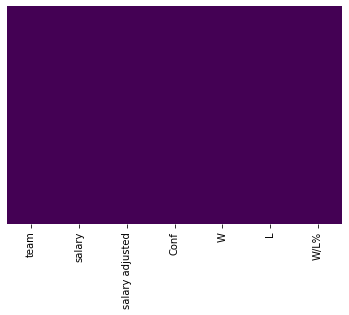

In [48]:
# win percentage from basketball reference.com
win2021 = pd.read_csv('winpercent2021.csv',
                      usecols=['Team','Conf','W','L','W/L%'])

# Team salary data for the 2021 season
team2021 = teamData[teamData["Year"]==2021]

team2021 = team2021.merge(win2021,how='left', left_on="team", right_on="Team")
team2021.drop(['Year','Team','rank'],axis=1,inplace=True)
display(team2021.head(5))

# using a heat map to check for any missing values
sns.heatmap(team2021.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')

## Player Data

For player data we will be using the csv file that was scraped from the ESPN website. This player data contains columns for
the player rank, name, position, team, salary (USD) and season. The data is already tidy, however we will need to further subset
our data into individual player positions to explore the relationship between player salary and player position.
1. First, we will check for any missing data using a heatmap from the seaborn package. Any missing values would have showed up as a yellow line.
2. For our analysis we only need to keep 4 columns; Name, Position, Salary, and Season.
3. Next, we will be making 7 subsets of our data for each position found in our original data set (position)
  * Center (C), Power Forward (PF), Small Forward (SF), Shooting Guard (SG), Point Guard (PG), Forward (F),
and Guard (G).
    * There are 2 other positions that were omitted which were Shooting Guard and Small forward (GF) and NA.
These positions only made up 57 of these players out of the 10476 total. We could have arbitrarily assigned the GF to either an SG or SF if
there were more of those designations in the dataset.
    * The NA's span from the 2002 season to the 2013 and have players
that may have been demoted to the NBA-G which is their minor league or the NBA-D league for their development league during
the season. Other reasons for these NA designations could be retirement, injuries or signings to international teams.
  * Created a function called makeSub, which creates a subset using *Pandas* operations
    * cPosition, pfPosition, sfPosition, sgPosition, pgPosition, fPosition, gPosition
4. To summarize our data, we will want to take the mean and median over all the salary columns.
  * For the mean, we created a function that groups all the players salaries by season and then computes the mean for that season. Afterwards it renames the column as mean salary.
  * For the median, we created another function that groups all players by salaries by season and then takes the median. We added a second column to the data set and called it median salary.
  * We reset our index after to flatten our datasets back to a 2d data set.
</br></br>

After working with our data, we noticed some interesting results in the 2005 season. After looking at the data again, we noticed
that the ESPN website we pulled the data from only had information on 120 players when there should be upwards of 450 players.
To remedy this, we had to append our position data set, with data collection from hyperhoops.com and basketball-reference.com

1. Reading and cleaning the data
  * This includes searching for NaN rows and removing them
  * Converting numerical values in the dataset to integers to match our existing dataset
  * Renaming the 'players' column to 'name'
2. Formatting data set to match our existing dataset
  * Dropping the adjusted salary column which was not used in our original dataset
  * Reorganizing the columns to match our original data set (name, position, salary, season)
3. Appending the previous column with our new data
  * Since know which season is the culprit, will drop all rows containing the season 2005 in our original dataset
    * We know there are only 120 players recorded in the 2005 season, so when we drop them we should have a total row count of 10356
  * Next, we will simply concatenate the two datasets together since we made sure that our columns match the original order

At this point, both our team salary and player salary data sets are tidy, with no missing or erroneous data, and are ready to for exploration and analysis.

,name,position,salary,season
0,Shaquille O'Neal,C,17142000,2000
1,Kevin Garnett,PF,16806000,2000
2,Alonzo Mourning,C,15004000,2000
3,Juwan Howard,PF,15000000,2000
4,Scottie Pippen,SF,14795000,2000


,player,salary,salary adjusted,season,position
0,Aaron McKie,8500000,11266192,2005,PG
1,Aaron Miles,155614,206256,2005,PG
2,Aaron Williams,3375000,4473341,2005,C
3,Adonal Foyle,7312500,9692239,2005,C
4,Adrian Griffin,768718,1018885,2005,SG


,player,salary,salary adjusted,season,position
0,Aaron McKie,8500000,11266192,2005,PG
1,Aaron Miles,155614,206256,2005,PG
2,Aaron Williams,3375000,4473341,2005,C
3,Adonal Foyle,7312500,9692239,2005,C
4,Adrian Griffin,768718,1018885,2005,SG


,name,position,salary,season
474,Zaza Pachulia,C,4000000,2005
475,Zeljko Rebraca,C,3000000,2005
476,Zendon Hamilton,C,329138,2005
477,Zoran Planinic,PG,1127280,2005
478,Zydrunas Ilgauskas,C,8740000,2005


,name,position,salary,season
0,Shaquille O'Neal,C,17142000,2000
2,Alonzo Mourning,C,15004000,2000
9,Shawn Kemp,C,10780000,2000
20,Vlade Divac,C,8837000,2000
21,Bryant Reeves,C,8666000,2000
24,Elden Campbell,C,7975000,2000


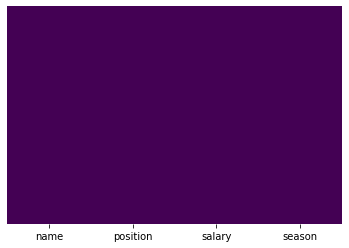

In [15]:
#### Functions
# creates a subset of the data where x data to be used, and pos is the position
def makeSub(x,pos):
    return x[x["position"] == pos]


# groups the position data by years and calculates the mean salary
def meanCalc(x):
    return (x.set_index('season')
            .groupby(level=0).mean()
            .rename(columns={"salary":"mean salary"}))

# groups the position data by years and calculates the median salary
def addMed(x):
    return (x.set_index('season')
            .groupby(level=0).median())

#### Reading original data
# Original player data has 10476 rows and 6 columns
position = pd.read_csv('nba-salaries.csv',
                     usecols=['name','position','salary','season'])

display(position.head(5))

#### Appending original data
df2 = pd.read_csv('sal05.csv')
display(df2.head())

# data cleaning
# drops extra rows
append05 = df2.dropna(axis=0)

#convert floats to ints
append05[['salary','salary adjusted','season']] = append05[["salary",'salary adjusted','season']].astype(int)
display(append05.head())

# data formatting
append05.drop("salary adjusted",axis=1,inplace=True)
append05.rename(columns={'player':'name'},inplace=True)
cols = ["name",'position','salary','season']
append05 = append05[cols]

# appending data
# dropping 2005 season in original data set
position2 = position[position["season"]!= 2005] #10356 rows
# concatenating both data sets
position2 = pd.concat([position,append05])
position2['position'] = position2['position'].str.strip()
display(position2.tail())

# using a heat map to check for any missing values
sns.heatmap(position2.isnull(),
             yticklabels=False,
             cbar=False,
             cmap='viridis')

#### Subset data
#  separating the subset into the different basketball positions C, PF, SF, SG, PG, F, G
cPosition = makeSub(position2,"C") # 1996 rows
pfPosition = makeSub(position2, "PF") # 1771 rows
sfPosition = makeSub(position2, "SF") # 1558 rows
sgPosition = makeSub(position2, "SG") # 1671 rows
pgPosition = makeSub(position2, "PG") # 1542 rows
fPosition = makeSub(position2, "F") # 871 rows
gPosition = makeSub(position2, "G") # 1009 rows
display(cPosition.head(6))

In [16]:
# center subset
cMean = meanCalc(cPosition)
cMean['median salary']= addMed(cPosition)
cMean.reset_index(inplace=True)
display(cMean.head(6))
# pf subset
pfMean = meanCalc(pfPosition)
pfMean['median salary']= addMed(pfPosition)
pfMean.reset_index(inplace=True)
# sf subset
sfMean = meanCalc(sfPosition)
sfMean['median salary']= addMed(sfPosition)
sfMean.reset_index(inplace=True)
# sg subset
sgMean = meanCalc(sgPosition)
sgMean['median salary']= addMed(sgPosition)
sgMean.reset_index(inplace=True)
# pg subset
pgMean = meanCalc(pgPosition)
pgMean['median salary']= addMed(pgPosition)
pgMean.reset_index(inplace=True)
# f subset
fMean = meanCalc(fPosition)
fMean['median salary']= addMed(fPosition)
fMean.reset_index(inplace=True)
# g subset
gMean = meanCalc(gPosition)
gMean['median salary']= addMed(gPosition)
gMean.reset_index(inplace=True)

,season,mean salary,median salary
0,2000,5.498107e+06,4903500.0
1,2001,4.460443e+06,2880000.0
2,2002,3.599835e+06,2419000.0
3,2003,5.038186e+06,4000000.0
4,2004,5.983000e+06,4400000.0
5,2005,4.451774e+06,3267500.0


## Analysis Through Data Visualization
As we became familiar with our data sets, we came across a few items that are worth highlighting before diving into the exploratory data analysis below. The first is in regard to the salary data itself. The information reported online is not necessarily the salary that will end up being paid to an individual athlete rather, it is what the team has committed to pay in honoring the contract with the athlete. The amount actually paid by a team to a player may differ for a variety of reasons, and often times negotiations between teams to trade players will result in breaking and renegotiating contracts before the end of the initial contract period. As a result, the actual flow of money may not be exactly as represented by the stated salaries. Despite this, our team is comfortable in using the salary information as presented because the salary represents the full amount the team is willing to pay, assuming the contract is seen through to the end. Furthermore, as we are concerned with the allocations of salaries amongst teams and players, the amount committed to be paid still represents the value of each athlete to the team. As a result, we are comfortable continuing our analysis with the data collected.

Another point worth noting is in regard to the collective bargaining agreement (CBA) between the NBA and the Players Association. This agreement stipulates a minimum salary and maximum salary that teams must pay to players based on a variety of factors. The agreement sets out the salary based on these factors for the first year of the agreement and specifies the rate at which a salary may increase or decreased for the following seasons. These agreements are periodically reviewed and the most recent agreement took effect July 1, 2017
and is effective through the 2023-2024 season (https://nbpa.com/cba). These contract limitations defined within the CBA may reduce the number and/or magnitude of extreme outliers in the data. We are comfortable using the salary data as [...].

A final note regarding our analysis is that we examined the salaries paid by the teams to the athletes. We do not take into consideration the various other forms of compensation an athlete may receive through other avenues such as brand/product endorsements, appearance fees, or sponsorships. These deals can often form a substantial proportion of a high performing athlete’s income but, fall outside the scope of this analysis.

### 1. How are the salaries of NBA players divided amongst the teams in the league and amongst the players within these teams?
#### Salary Allocation Amongst Teams
In order to understand the bigger picture, we believe it is helpful to examine the data for the NBA over time. The graphs below illustrate some general information in regards to team salaries across the league over the period 1991 to 2021.

,rank,team,salary,salary(Inflation),Year,conference
29,1,Portland,87395140,130685637,2001,Western Conference
30,2,New York,74007738,110666888,2001,Eastern Conference
31,3,Miami,73472329,109866267,2001,Eastern Conference
32,4,Brooklyn,68977578,103145079,2001,Eastern Conference
33,5,Washington,59085969,88353738,2001,Eastern Conference


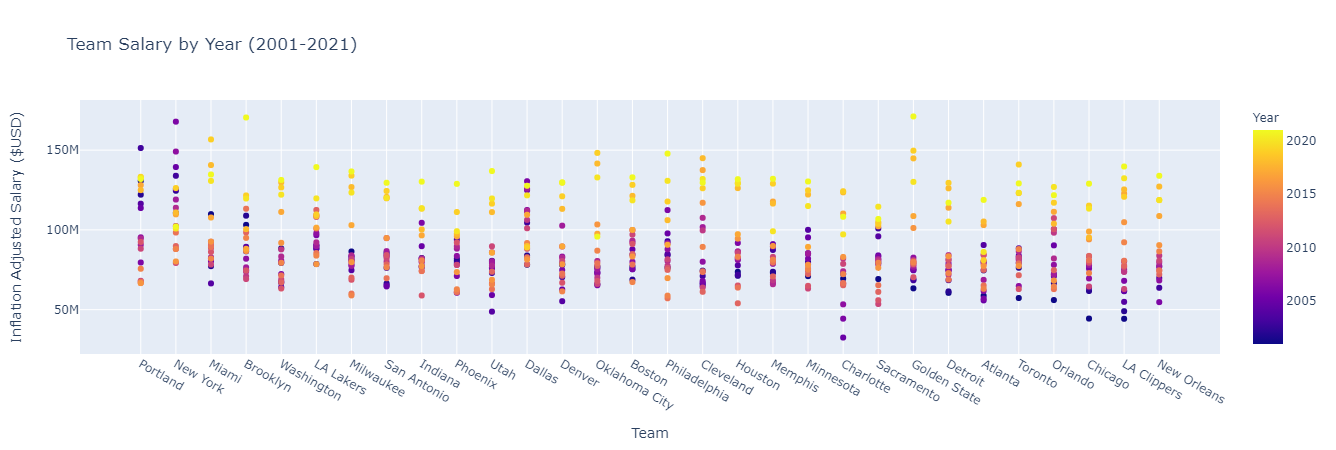

In [14]:
team_sal = pd.read_csv("teamSalary.csv")
#removing commas from salary column to allow for plotting as numeric
team_sal.replace(',','',regex=True,inplace=True)

#Dictionary created to divide teams into the appropriate Western and Eastern Conference categorizations
conference = {'Golden State' : 'Western Conference', 'Brooklyn' : 'Eastern Conference', 'Philadelphia' : 'Eastern Conference', 'LA Clippers' : 'Western Conference', 'LA Lakers' : 'Western Conference', 'Utah' :
              'Western Conference', 'Milwaukee' : 'Eastern Conference', 'Miami' : 'Eastern Conference', 'New Orleans' : 'Western Conference', 'Boston' : 'Eastern Conference', 'Memphis': 'Western Conference', 
              'Portland' : 'Western Conference', 'Houston' : 'Western Conference', 'Washington' : 'Eastern Conference', 'Minnesota' : 'Western Conference', 'Indiana' : 'Eastern Conference', 'Denver' : 
              'Western Conference', 'Cleveland' : 'Eastern Conference', 'San Antonio' : 'Western Conference', 'Toronto' : 'Eastern Conference', 'Chicago' : 'Eastern Conference', 'Phoenix':'Western Conference',
              'Dallas' : 'Western Conference', 'Orlando' : 'Eastern Conference', 'Atlanta' : 'Eastern Conference', 'Detroit' : 'Eastern Conference', 'Charlotte' : 'Eastern Conference', 'Sacramento' : 'Western Conference',
              'New York' : 'Eastern Conference', 'Oklahoma City' : 'Western Conference'}

#using the conference dictionary, creating a new column in order to populate based on the dictionary key-value pairs
team_sal['conference'] = team_sal['team'].map(conference)
team_sal = team_sal[team_sal['Year']>=2001]
display(team_sal.head(5))

fig1 = px.scatter(team_sal, x='team',y='salary(Inflation)',color='Year',title='Team Salary by Year (2001-2021)', labels={"salary(Inflation)": "Inflation Adjusted Salary ($USD)",
                                                                                                                         "team" : "Team"})
fig1.show()

The scatter plot above illustrates the inflation adjusted salaries paid by each team during the 20 seasons from 2001 to 2021. There is a general upward trend in the salaries paid for the majority of the teams – this is seen in the coloration by season/year. The gradient from blues to yellow show the progression through time, and generally speaking, the salary of more recent seasons lie above the salary level of past seasons. There are a few teams such as Portland, New York, and Dallas which show some deviation with historical seasons plotting higher salaries than subsequent seasons. Overall, there is a fairly clear trend across all the teams indicating that the salaries of each of the teams are increasing over time.

This may reflect a variety of factors, including but not limited to, the aforementioned CBA which stipulates wage growth over seasons as well as general inflation that would see prices/wages increase in all areas of the economy (although perhaps not equally). We will examine team salaries further in the following plots.

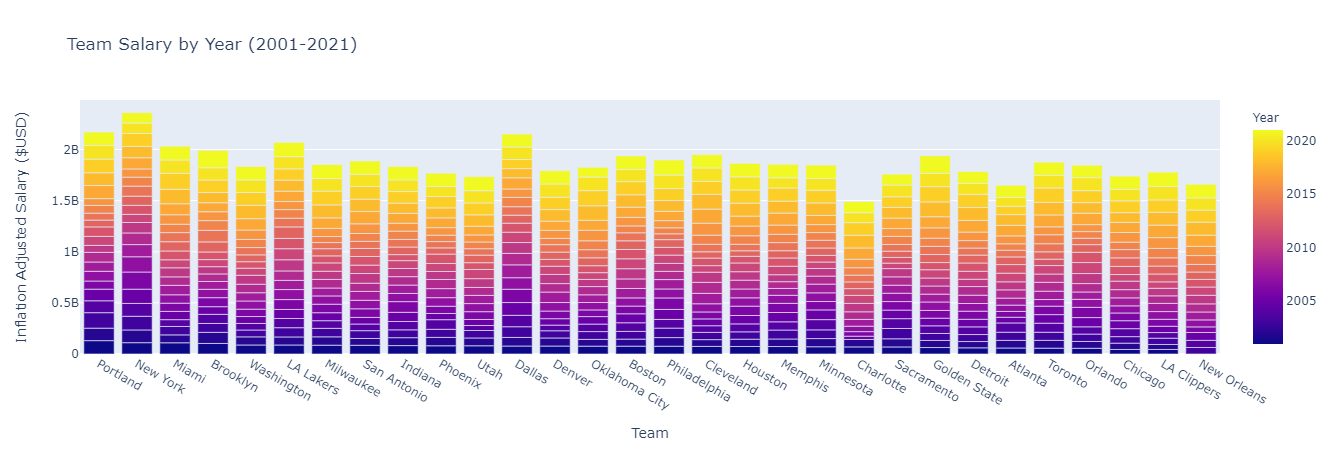

In [15]:
fig2 = px.bar(team_sal, x='team', y='salary(Inflation)', color='Year',title='Team Salary by Year (2001-2021)',labels={"salary(Inflation)": "Inflation Adjusted Salary ($USD)",
                                                                                                                         "team" : "Team"})
fig2.show()

The above bar chart illustrates inflation adjusted salary information once again for each team. In plotting this information in a different form, we may gain some additional insights not previously observed in the scatter plot. Not only does this chart illustrate the difference in team salaries by season through the size of each segment within the bars, it also shows an interesting allocation across teams, namely the total compensation for the previous 20 years.Examining the height of the overall bars for each team indicates the total salaries paid during the past 20 seasons – this clearly shows that some teams have paid far larger salaries than others over the 20-year period being examined. For example, New York shows just under 2.5 billion dollars paid (adjusted for inflation) while Charlotte shows under 1.5 billion dollars (adjusted for inflation) over the same time frame.

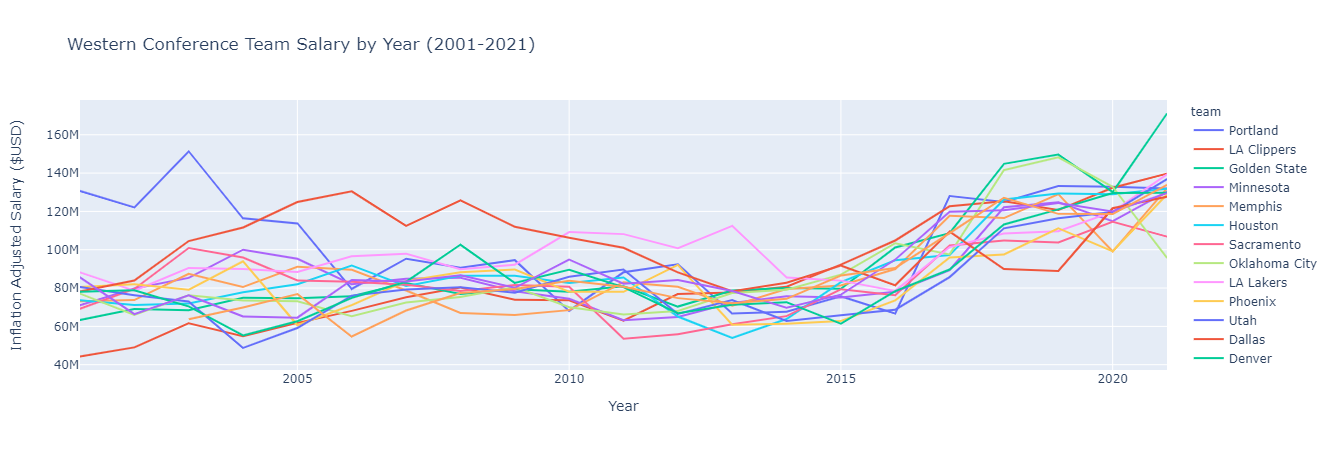

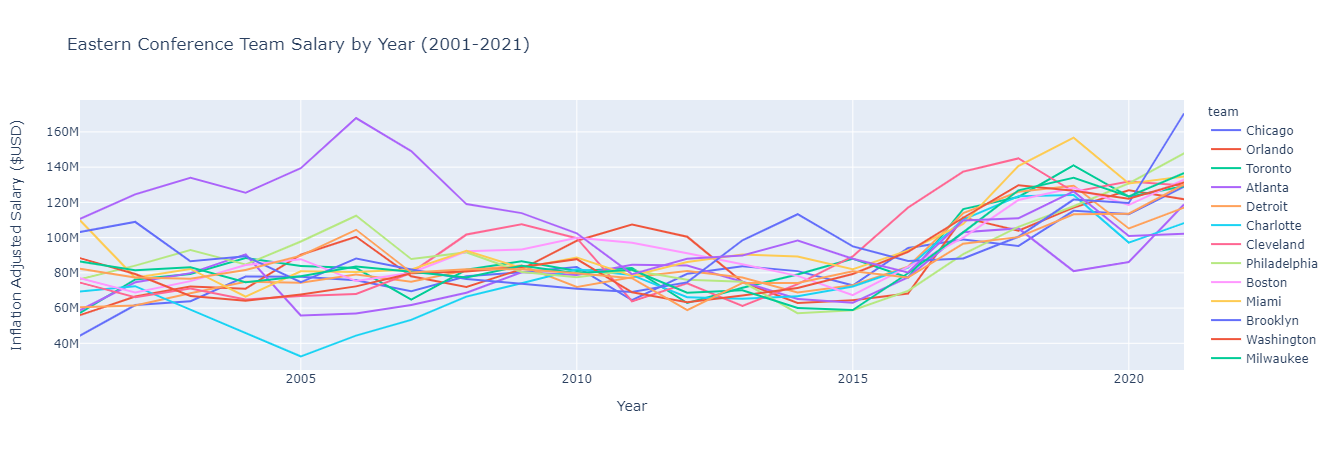

In [18]:
#sorting by year in order to plot salaries as a time series 
team_sal_yr_srt = team_sal.sort_values('Year',ascending=True)

fig3 = px.line(team_sal_yr_srt[team_sal_yr_srt['conference']=='Western Conference'], x='Year',y='salary(Inflation)',color='team',
               title='Western Conference Team Salary by Year (2001-2021)', labels={'salary(Inflation)': 'Inflation Adjusted Salary ($USD)'})
fig3.show()

fig4 = px.line(team_sal_yr_srt[team_sal_yr_srt['conference']=='Eastern Conference'], x='Year',y='salary(Inflation)',color='team',title='Eastern Conference Team Salary by Year (2001-2021)', 
               labels={'salary(Inflation)': 'Inflation Adjusted Salary ($USD)'})
fig4.show()

In order to avoid clutter in the above line graphs illustrating the inflation adjusted salaries for each team by year the Western and Eastern Conference were plotted separately. When examining the salaries adjusted for inflation, the amounts have been fairly consistent from 2001 through 2015 with a couple of teams in each conference deviating from the cluster of the majoirty of teams. In the Western conference, Portland and Dallas appear to have paid slightly higher salaries than most teams in the early and mid 2000s respectively. The most notable of these deviations are in the Eastern Conference with New York from 2001 to 2008 paying much higher salaries and Charlotte paying lower salaries from 2004 to 2006 [... Charlotte seems to be missing some values 2003&2004]

There is a noticable change in the trend of inflation adjusted salaries in both conferences beginning after 2015. From the line graphs it appears that all teams started growing their salaries steadily year over year, and the approximate rate of growth appears to be similar across the teams.

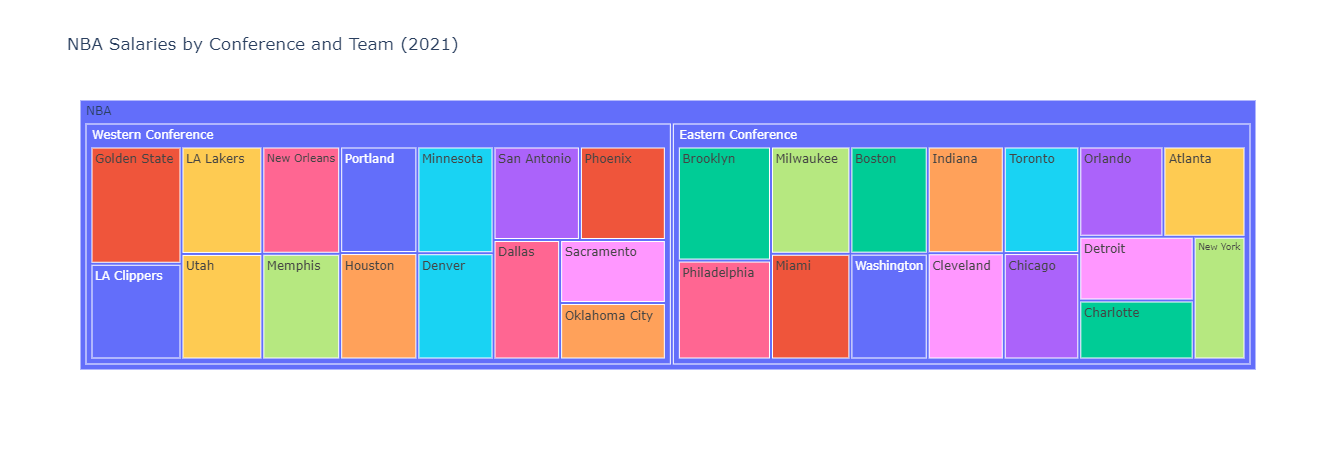

In [19]:
team_sal_2021 = team_sal[team_sal['Year'] == 2021]

fig5 = px.treemap(team_sal_2021, path=[px.Constant("NBA"), 'conference', 'team'], values='salary',color='team', title='NBA Salaries by Conference and Team (2021)')
fig5.show()

The above tree map helps to further illustrate the allocation of total NBA salaries across the teams in the league.
The plot includes only the salary information for the 2021 season for clarity. The allocation of salaries between the Western and Eastern conference are very close.
Within each conference, the teams with the greatest salaries are identified by the relative size of their corresponding rectangle.
There are some significant differences between the lowest paid teams and the highest paid teams –
many of which are familiar even to layman due to their presence in media and the power of their brand.

#### Salary Allocation Within Teams

We wanted to explore how different NBA teams allocate their salaries amongst their players. To accomplish this, we will be comparing three different NBA teams based on their different financial structure and philosophy.
1. New York Knicks
2. Los Angeles Lakers
3. Toronto Raptors

Using our team salary data, we will create 3 subsets of our data based on the team name. We will then create a Pie chart for each
of our teams to see how proportion of salaries are distributed.

In [22]:
sal = pd.read_csv("nba-salaries.csv")
sal1 = pd.read_csv("nba-salaries.csv")
sal2 = pd.read_csv("nba-salaries.csv")

sal.drop(sal.index[sal['team']!='New York Knicks'],inplace=True)
sal1.drop(sal1.index[sal1['team']!='Los Angeles Lakers'],inplace=True)
sal2.drop(sal2.index[sal2['team']!='Toronto Raptors'],inplace=True)

In [23]:
sal.drop(sal.index[sal['season']!= 2021],inplace=True)
sal1.drop(sal1.index[sal1['season']!= 2021],inplace=True)
sal2.drop(sal2.index[sal2['season']!= 2021],inplace=True)

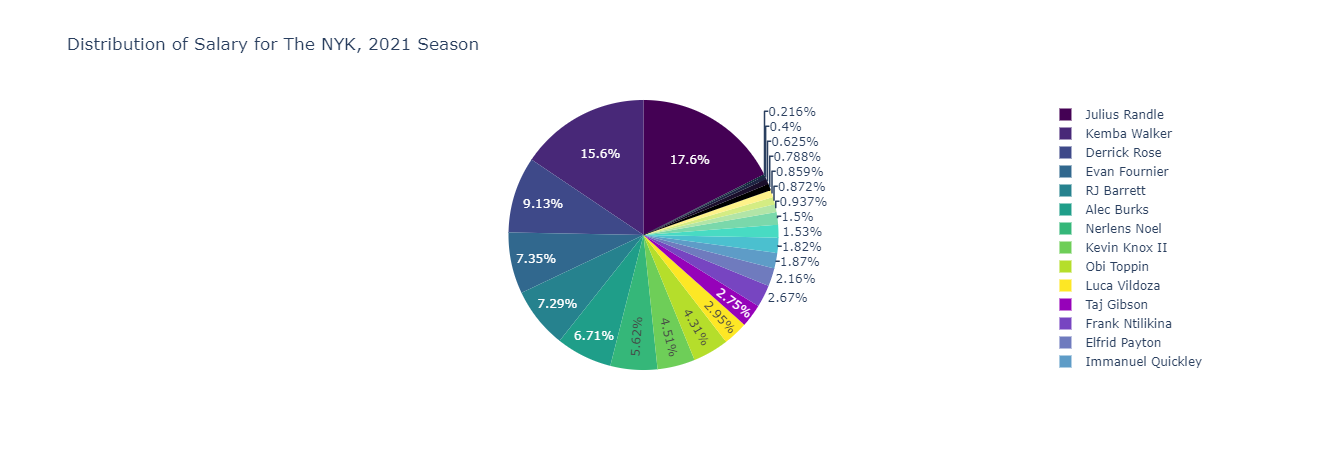

In [24]:
fig = px.pie(sal,values='salary',names='name',title='Distribution of Salary for The NYK, 2021 Season',
             color_discrete_sequence=px.colors.sequential.Viridis)
fig.show()

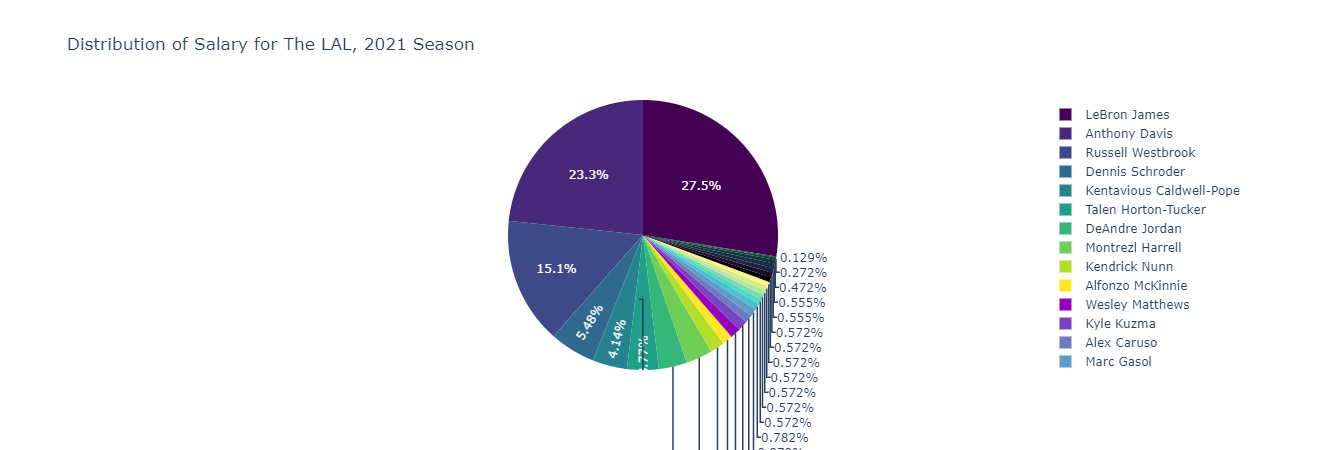

In [25]:
fig2 = px.pie(sal1,values='salary',names='name',title='Distribution of Salary for The LAL, 2021 Season',
              color_discrete_sequence=px.colors.sequential.Viridis)
fig2.show()

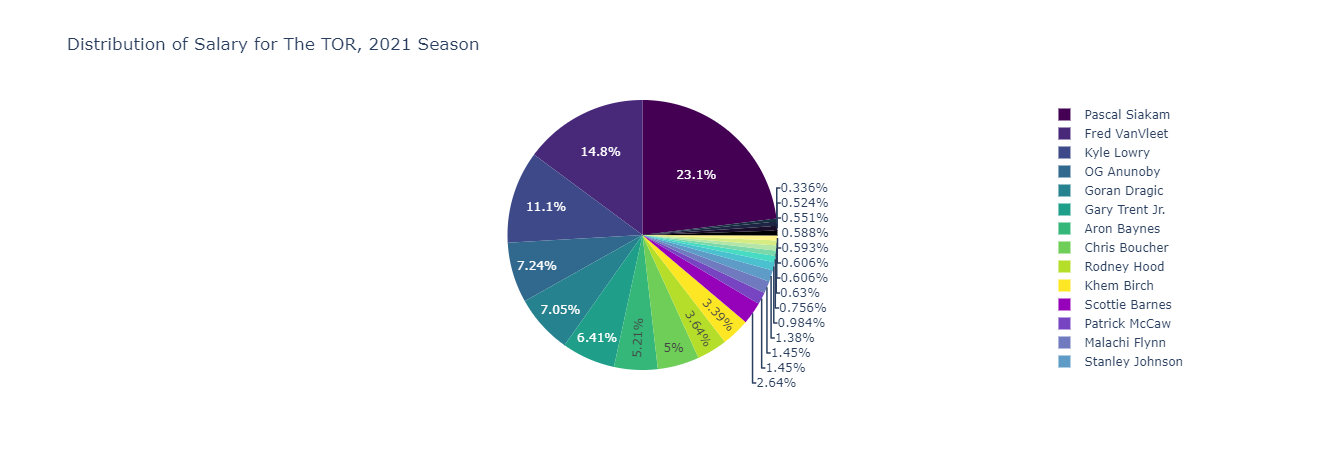

In [26]:
fig3 = px.pie(sal2,values='salary',names='name',title='Distribution of Salary for The TOR, 2021 Season',
              color_discrete_sequence=px.colors.sequential.Viridis)
fig3.show()

The Los Angeles Lakers have the most extreme discrepancy of the three franchises, with two players taking up around 50 percent of all the salary.
Teams with expensive stars heavily rely on those two players and struggle with developing an all around team.
This leaves the team very vulnerable to injuries, but typically the great players (when healthy) lead to championships.


### 2. Is there a significant correlation between the salaries paid and the success of a team?



### Examining Team Salary and Wins

We will not be doing an in depth analysis on this topic but rather just plot the data to see if we can notice any trends we can investigate further.
Using our team2021 subset, we will use the 2020-2021 season and plot the team salary and the number of wins for this one season.
Before we analyze our data, we have to convert the salary column as a numeric. Afterwards, we will make a bubble graph that shows, salary and win percentage,
displaying the difference between the Eastern and Western conferences.

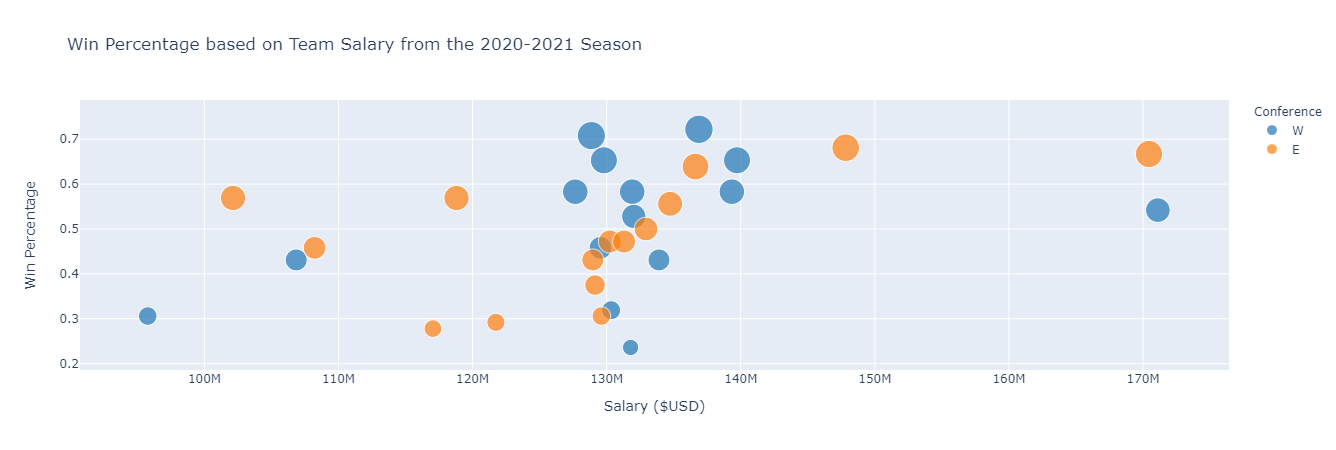

In [93]:
# Converting salary to numeric to be sorted
team2021['salary'] = pd.to_numeric(team2021['salary'])
team2021.sort_values('salary',inplace=True)
fig11 = px.scatter(team2021, x="salary",y='W/L%',
                   size="W",color='Conf', hover_name="team",
                   title="Win Percentage based on Team Salary from the 2020-2021 Season",
                   color_discrete_sequence=px.colors.qualitative.D3)
fig11.update_layout(
    xaxis_title="Salary ($USD)",
    yaxis_title="Win Percentage",
    legend_title_text="Conference"
)
fig11.show()

Overall, most of the teams in the league have a team salary between 120M and 140M. Also, there are no discernible patterns when it comes to
salary and win percentage.  For example, the New York Knicks in 2020/2021 had a low team salary ($102M), but had a higher win percentage (56.9%) than a majority of the teams in the league.
In general, the western conference teams have a higher win percentage than the eastern conference teams with a similar salary.

To get a better visualization of our data, we can obtain a larger data set by going back and doing a range of seasons instead of just one.
This might provide us with some more information and possible trends in the data.

### 3. How are player salaries related to the position played? How have these changed over time?
We wanted to take a look at how teams and organizations have valued positions over time. First we will roughly examine our
player salary data set with a quick 5-number summary in the form of a box plot. Next we will want to make use of
the 7 subsets of player salary data that were wrangled earlier and look at the mean and median changes in salary.

First we did a quick 5 number summary statistic on each of the positions and presented them as a series of box plots to see
if we can identify any obvious outliers or trends. For this, our original player salary data set (positions) and removing the 57
NA and GF positions. This was done using the boxplot function from plotly express.

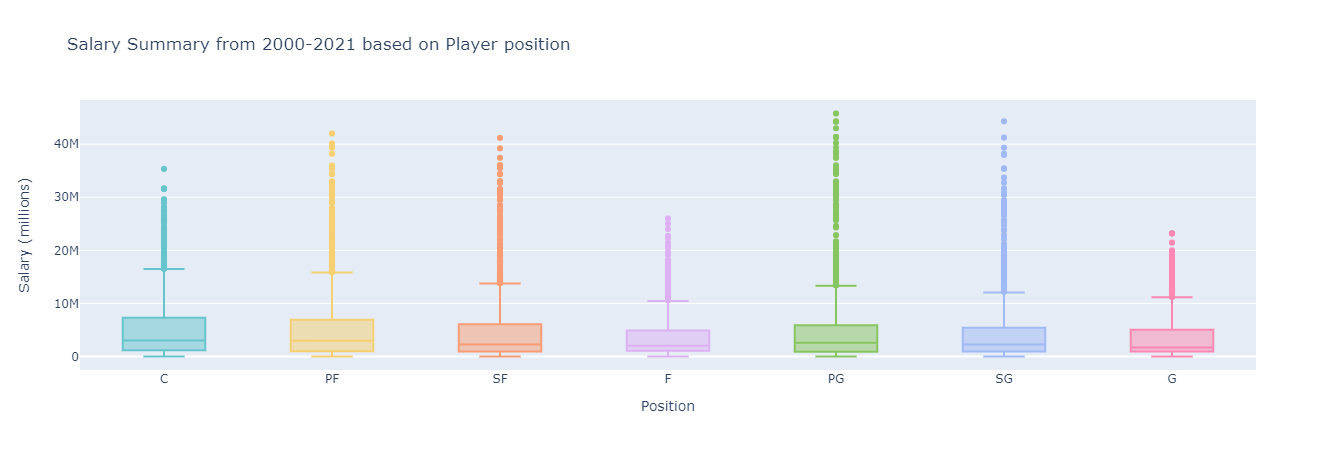

In [222]:
# 5 number summary of of player salary data based on position
sumPosition = position2.drop(position2[(position2['position'] == "NA") | (position2['position'] == "GF")].index) # 10418

fig7 = px.box(sumPosition, x= "position", y="salary",
             title="Salary Summary from 2000-2021 based on Player position",
             color="position", color_discrete_sequence=px.colors.qualitative.Pastel)
fig7.update_layout(
    xaxis=dict(
        tickmode="array",
        tickvals=[0,1,2,3,4,5,6],
        ticktext=['C','PF','SF','F','PG','SG','G']
    ),
    showlegend=False,
    yaxis_title="Salary (millions)",
    xaxis_title="Position"
)
fig7.show()

For all 7 positions, we see major outliers as the salaries for players have changed a lot over the years. The smallest
interquartile range (IQR) is seen from the Forward position. A small IQR means that the middle half of the data has little
variability. However, we only had 874 players that were Forwards from 2000-2021 which could provide a small explanation
for the variability. The position with the highest number of outliers is the Point Guard position which can be a reflection
on how organizations and teams value the position. Point Guards are the playmakers and usually the captains of the team. They
usually begin every play and able to set up other players for success.

In all positions, we see a lot of players between the median and upper quartile group in terms of salary which indicates we have
some skewness to our data. We see that our data is right-skewed (positive-skewed) since upper tail is much longer than the lower tail in all our cases.

For the median, it appears that all 7 positions have about the same median salary, except for Guards and Forwards, which have a median salaries of
1.68 million and 2.03 million respectively. In terms of who gets paid the most, we see that Centers, Power Forwards have the highest
statistical pay at approximately 17.0 million and 16.0 million respectively.

To determine why this is the case, we will be examining position salary over time using a grouped barchart to examine both the
mean and the median of the player salaries. Medians are more robust than means which means large outliers won't affect our
analysis as much. We also added a slider to the grouped bar graph to be able to examine sections of the scatter plots more closely.

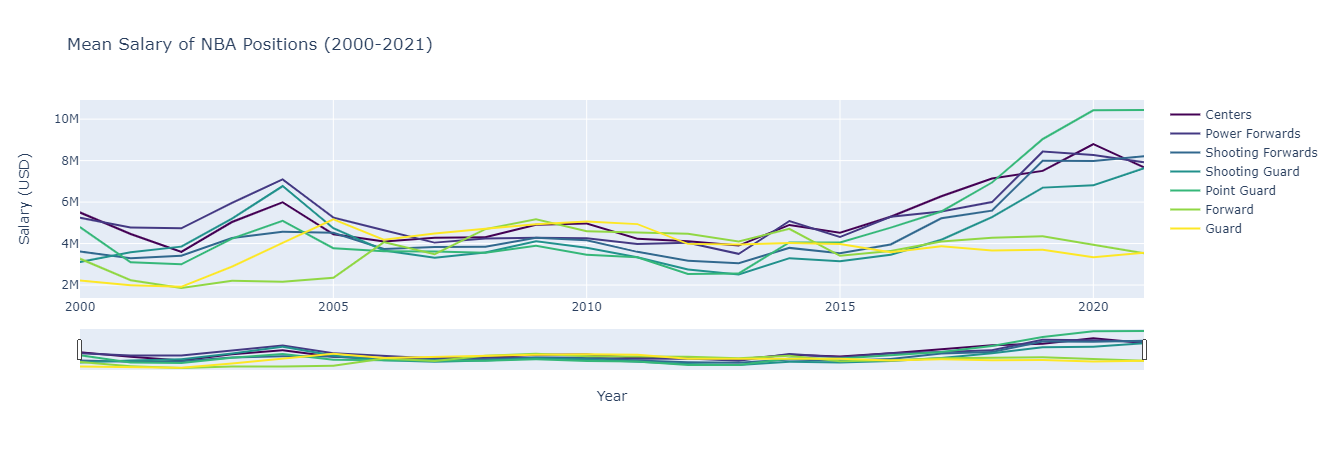

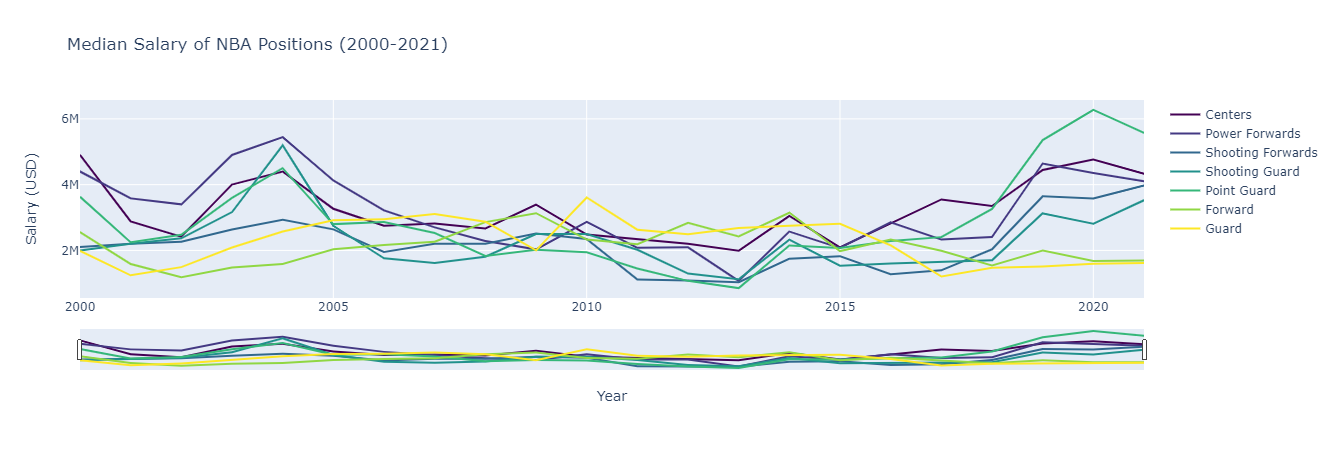

In [25]:
# player position and salaries over time
# mean
fig8 = go.Figure(data=[
    go.Scatter(name="Centers",y=cMean["mean salary"],x=cMean['season'],marker_color="#440154"),
    go.Scatter(name="Power Forwards",y=pfMean["mean salary"],x=pfMean['season'],marker_color="#443983"),
    go.Scatter(name="Shooting Forwards",y=sfMean["mean salary"],x=sfMean['season'],marker_color="#31688e"),
    go.Scatter(name="Shooting Guard",y=sgMean["mean salary"],x=sgMean['season'],marker_color="#21918c"),
    go.Scatter(name="Point Guard",y=pgMean["mean salary"],x=pgMean['season'],marker_color="#35b779"),
    go.Scatter(name="Forward",y=fMean["mean salary"],x=fMean['season'],marker_color="#90d743"),
    go.Scatter(name="Guard",y=gMean["mean salary"],x=gMean['season'],marker_color="#fde725"),
    ],
    layout = go.Layout(
        title=go.layout.Title(text="Mean Salary of NBA Positions (2000-2021)")))
fig8.update_layout(barmode="group",
                   xaxis=dict(
                       rangeselector=dict(
                           buttons=list([
                               dict(count=1,
                                    step="year",
                                    stepmode="backward"),
                           ])
                       ),
                       rangeslider=dict(
                           visible=True
                       ),
                   ))
fig8.update_xaxes(title_text="Year")
fig8.update_yaxes(title_text="Salary (USD)")
fig8.show()


# median
fig9 = go.Figure(data=[
    go.Scatter(name="Centers",y=cMean["median salary"],x=cMean['season'],marker_color="#440154"),
    go.Scatter(name="Power Forwards",y=pfMean["median salary"],x=pfMean['season'],marker_color="#443983"),
    go.Scatter(name="Shooting Forwards",y=sfMean["median salary"],x=sfMean['season'],marker_color="#31688e"),
    go.Scatter(name="Shooting Guard",y=sgMean["median salary"],x=sgMean['season'],marker_color="#21918c"),
    go.Scatter(name="Point Guard",y=pgMean["median salary"],x=pgMean['season'],marker_color="#35b779"),
    go.Scatter(name="Forward",y=fMean["median salary"],x=fMean['season'],marker_color="#90d743"),
    go.Scatter(name="Guard",y=gMean["median salary"],x=gMean['season'],marker_color="#fde725"),
    ],
    layout = go.Layout(
        title=go.layout.Title(text="Median Salary of NBA Positions (2000-2021)")))
fig9.update_layout(barmode="group",
                   xaxis=dict(
                       rangeselector=dict(
                           buttons=list([
                               dict(count=1,
                                    step="year",
                                    stepmode="backward"),
                           ])
                       ),
                       rangeslider=dict(
                           visible=True
                       ),
                   ))
fig9.update_xaxes(title_text="Year")
fig9.update_yaxes(title_text="Salary (USD)")
fig9.show()

### Trends
#### Overall
Overall we see there is a large drop in median and mean salary from 2005 and does not pick up again until about 2015. During
this time period, the NBA has had 3 collective bargaining agreements (CBA) with its players done in 2005, 2011 and 2017.
The fluctuations in the graph could be reflecting these CBA terms where player salary are negotiated.
The lowest median salaries in all positions came after 2010 to 2013. The most recent NBA lockout was in 2011 which falls
in this time frame. This reduced the number of total regular season games from 82 to 66 as players were negotiating the
new CBA agreement.

#### Specific
From 2000 to 2004, the position data matches with our summary data with Centers and Power Forwards getting paid more than
Forwards and Guards. For the next 10 years, from 2005-2015 we see that the Forwards and Guards have the highest median salary
over the rest of the positions. As we look at the latter half our data. we see that from 2016 to 2018 the positions with the
highest median salary switch back to Centers and Power Forwards with Forwards and Guards receding in median salary.
Finally, from 2017 to 2021, Point Guards are seen to beat out all other positions in terms of median salary.

#### Further Analysis
The swings in median salary for each position in basketball could be attributed to how the game has changed over the years and how teams
and organizations value certain player positions. To examine this, we could look at how many minutes each position has played
and see how that has changed over the years. We can also examine more basketball related statistics such as shot attempts or the
pace of the game and how that has impact position choice.

## Conclusion
x

## References - These are just copied from the proposal - we will edit as necessary

ESPN, NBA Player Salaries - 2021-2022. ESPN, Available at: http://www.espn.com/nba/salaries/_/ (Accessed September 27, 2021). 

HoopsHype, These are the 2012/13 salaries of all NBA teams. HoopsHype. Available at: https://hoopshype.com/salaries/2012-2013 (Accessed September 27, 2021). 

Nazrul, S.S., 2018. Web scraping html tables with python. Medium. Available at: https://towardsdatascience.com/web-scraping-html-tables-with-python-c9baba21059 
(Accessed September 26, 2021).

NBPA, Collective Bargaining Agreement (CBA), Available at: https://nbpa.com/cba (Accessed: 12 October 2021) 

Trading Economics, United States wages and Salaries growth 1960-2021 Data: 2022-2023 Forecast. Trading Economics. Available at: https://tradingeconomics.com/united-states/wagegrowth (Accessed September 27, 2021). 

Webb, E.G., 2020. Web scraping: NBA salaries. Unboxed Analytics. Available at: https://unboxed-analytics.com/data-technology/web-scraping-nba-salaries/ (Accessed September 27, 2021).